### **Libraries**

In [284]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")

In [285]:
#load the file
df = pd.read_csv('/content/spam new.csv', encoding='ISO-8859-1')

### **EDA**

In [286]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [287]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [288]:
df.shape

(5572, 5)

In [289]:
df.size

27860

In [290]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [291]:
df.ndim

2

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [293]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [294]:
df.duplicated().sum()

403

In [295]:
df.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [296]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [297]:
df.drop_duplicates(inplace=True)


In [298]:
df.duplicated().sum()

0

In [299]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [300]:
df = df[['v2', 'v1']]
df = df.rename(columns={'v2': 'messages', 'v1': 'label'})
df.head()

,messages,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [301]:
df['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

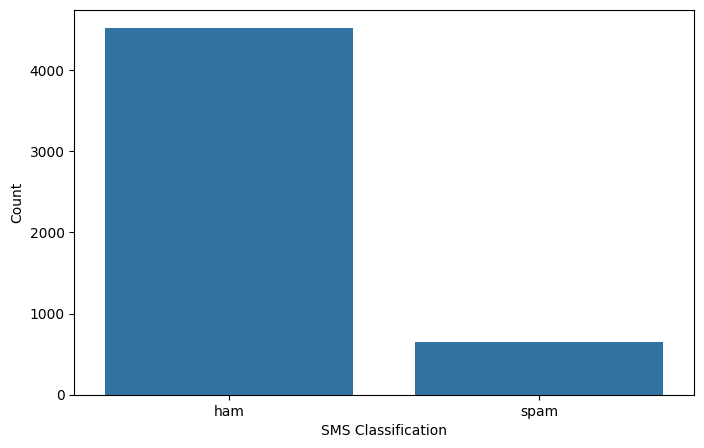

In [302]:
#Visualization
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=df)
plt.xlabel('SMS Classification')
plt.ylabel('Count')
plt.show()

### **Data preprocessing**

In [303]:
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # convert to lowercase
    text = text.lower()
    # remove special characters
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # remove stopwords
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

In [304]:
df['clean_text'] = df['messages'].apply(clean_text)
df.head()

,messages,label,clean_text
0,"Go until jurong point, crazy.. Available only ...",ham,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ham,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,ham,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",ham,nah think goes usf lives around though


### **Feature & Target splitting**

In [305]:
x = df['clean_text']
x.head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4               nah think goes usf lives around though
Name: clean_text, dtype: object

In [306]:
y = df['label']
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

### **Model training,prediction,accuracy_score**

In [307]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)

    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)

#     cv_score = cross_val_score(model, X, y, cv=5)
#     print("CV Score:", np.mean(cv_score)*100)
    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test, y_pred))

### **Model evaluation**

In [308]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 95.90100541376644
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1130
        spam       0.97      0.70      0.81       163

    accuracy                           0.96      1293
   macro avg       0.96      0.85      0.89      1293
weighted avg       0.96      0.96      0.96      1293



In [309]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)

Accuracy: 96.13302397525135
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1130
        spam       1.00      0.69      0.82       163

    accuracy                           0.96      1293
   macro avg       0.98      0.85      0.90      1293
weighted avg       0.96      0.96      0.96      1293



In [310]:
from sklearn.svm import SVC
model = SVC(C=3)
classify(model, X, y)

Accuracy: 97.91183294663574
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1130
        spam       0.99      0.84      0.91       163

    accuracy                           0.98      1293
   macro avg       0.99      0.92      0.95      1293
weighted avg       0.98      0.98      0.98      1293



In [311]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 97.37045630317091
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1130
        spam       1.00      0.79      0.88       163

    accuracy                           0.97      1293
   macro avg       0.99      0.90      0.93      1293
weighted avg       0.97      0.97      0.97      1293



Conclusion in all the models accuracy little bit only vary all model learn the data seems ok
